In [1]:
import pandas as pd
from scipy.stats.stats import pearsonr
import numpy as np
import scipy.stats as s
import seaborn as sns
from matplotlib import pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
original_dataset = pd.read_csv("./datasets/mushrooms.csv")

In [3]:
#for checking null values in any column
original_dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
#printing unique values of each column
for i in original_dataset.columns:
    print(original_dataset[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [5]:
# For filling the values
def fill_values(dataset,column,missing_value_as):
    #finding the index of missing values....
    missing_indices = np.array(dataset[dataset[column]==missing_value_as].index)
    #replacing missing values with NAN values for
    dataset[column].replace(to_replace = missing_value_as, value=np.nan, inplace = True)
    #the sum of the number of each value in that column
    relative_frequency= dict(dataset[column].value_counts()/dataset[column].value_counts().sum())
    #expecting the number of values according to their probabilities
    number_of_missing_values = np.random.multinomial(n=missing_indices.shape[0],pvals=list(relative_frequency.values()),size=1)
    #generating values according to their probability
    arr_of_found_val =found_number_of_values(number_of_missing_values,relative_frequency.keys()) # function calling
    
    dataset[column].fillna(value=dict(zip(missing_indices,arr_of_found_val)), inplace=True)

In [6]:
#generating values according to their probability
def found_number_of_values(num_of_miss_val,values):
    
    missing_values_found = np.empty(0) #array of found values
    
    for i,j in zip(num_of_miss_val[0],values):
        
        missing_values_found = np.append(missing_values_found, np.array(i*[j]))
        
    return missing_values_found

In [7]:
original_dataset['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [8]:
fill_values(original_dataset,'stalk-root','?') #calling a function

In [9]:
original_dataset['stalk-root'].value_counts()

b    5419
e    1610
c     791
r     304
Name: stalk-root, dtype: int64

In [10]:
working_dataset = original_dataset.copy()
working_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
row_indices = np.arange(0,len(original_dataset))
np.random.shuffle(row_indices)


In [12]:
shuffled_dataset = original_dataset.iloc[row_indices]
shuffled_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7309,e,x,f,w,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,s,g
3967,p,f,y,y,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,y,p
4839,p,f,y,y,f,f,f,c,b,p,...,k,n,b,p,w,o,l,h,v,p
4728,p,x,f,y,f,f,f,c,b,h,...,k,b,p,p,w,o,l,h,y,d
436,e,x,f,y,t,a,f,w,n,n,...,s,w,w,p,w,o,p,u,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,p,f,s,b,t,f,f,c,b,p,...,f,w,w,p,w,o,p,h,v,u
1481,e,x,s,n,f,n,f,w,b,n,...,s,w,w,p,w,o,e,k,s,g
4403,p,f,y,g,f,f,f,c,b,p,...,k,b,b,p,w,o,l,h,y,d
803,e,b,y,y,t,l,f,c,b,w,...,s,w,w,p,w,o,p,k,n,g


In [13]:
#for converting the column_values to unique number 
def converstion(dataset,column_name):
    unique_values = dataset[column_name].unique().tolist()
    unique_values.sort()
    convert = {column_name : {k: v for k,v in zip(unique_values,list(range(0,len(unique_values))))}}
    dataset.replace(convert,inplace=True)

In [14]:
for features_name in working_dataset.columns:
    converstion(working_dataset,features_name)

In [15]:
# for removing the single value column from a dataset
def remove_value_column(dataset_name,column_name):
    if len(dataset_name[column_name].unique()) == 1:
        dataset_name.drop([column_name], axis=1,inplace=True)

In [16]:
for column in working_dataset.columns:
    remove_value_column(working_dataset,column)

In [17]:
working_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [18]:
working_dataset.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


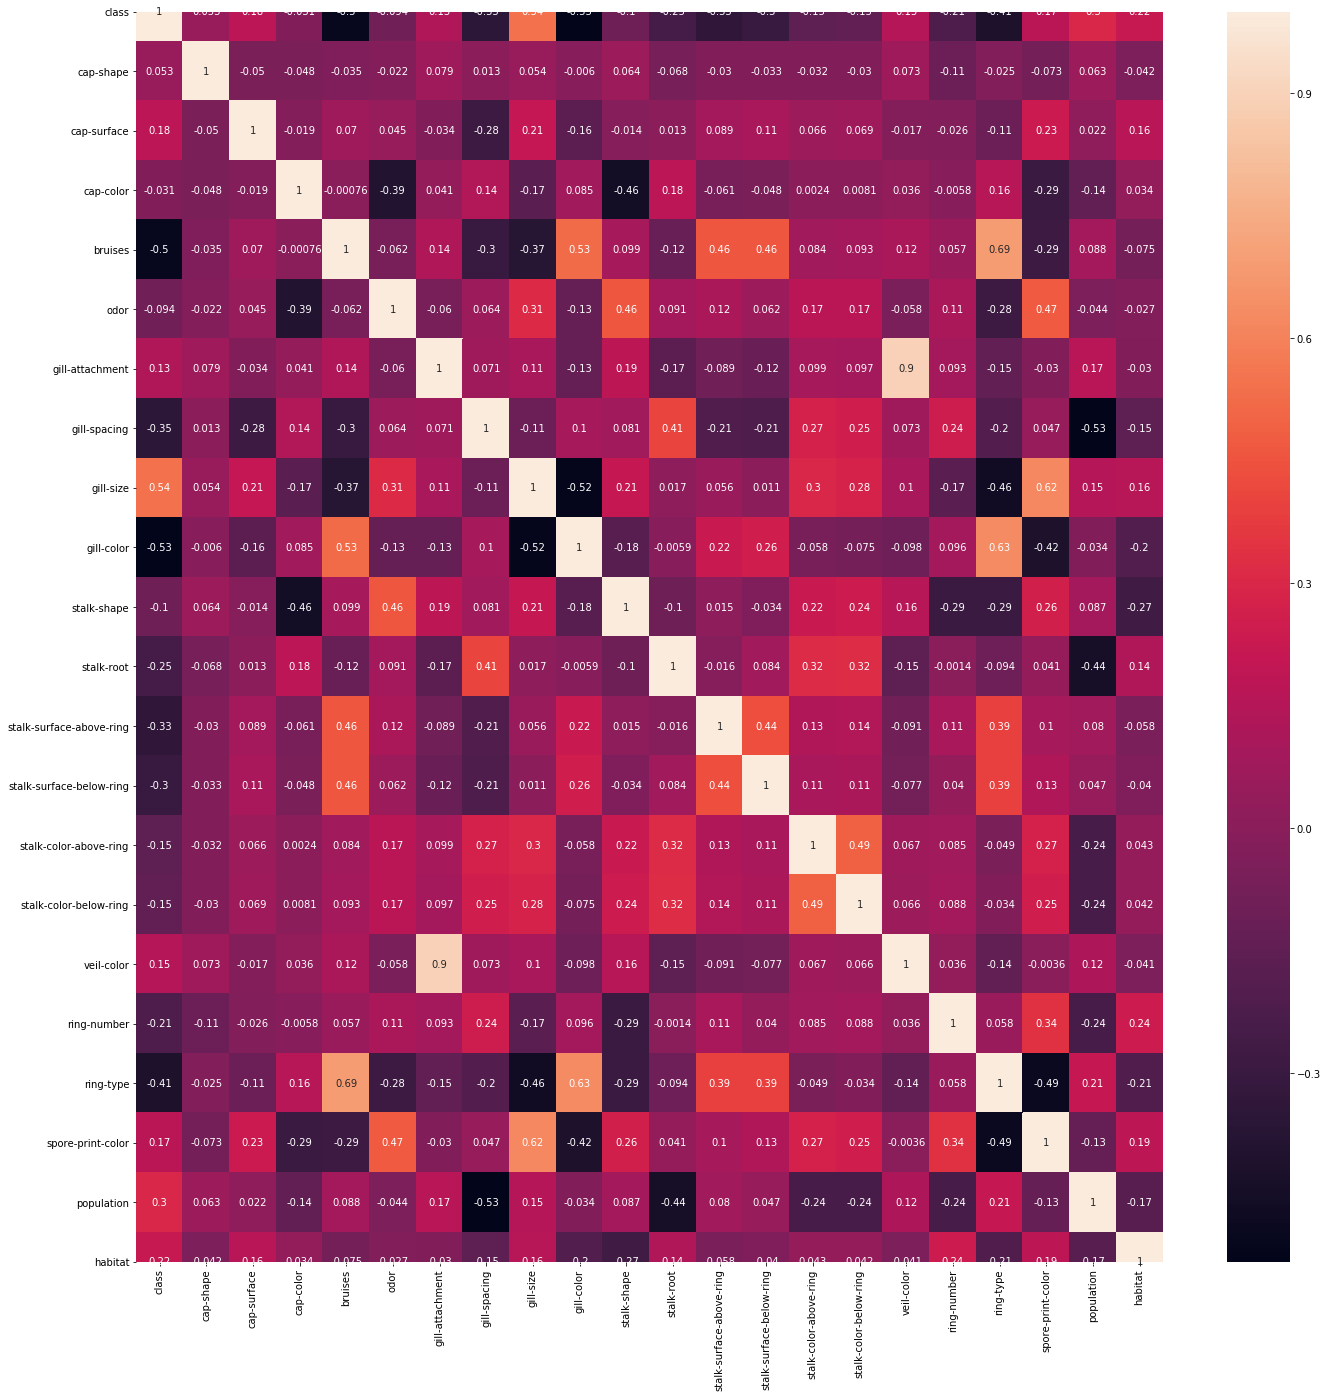

In [19]:
# for making the heatmap of correlation
fig, ax= plt.subplots(1, 1, figsize = (23, 23))
sns.heatmap(working_dataset.corr(), ax = ax, annot = True)
plt.show()

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

$$ \text{r} = \frac{\text{Covariance (x,y) }}{\sqrt(x).\sqrt(y)} $$

\begin{equation}
r/\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} 
\end{equation}

In [20]:
# Calculates a Pearson correlation coefficient
def check_pearson(column_name):
    r = pearsonr(working_dataset['class'],working_dataset[column_name])
    return abs(r[0])

In [21]:
# pearson correaltion of each column with target variable 'class'
pearson_correlation = {}
for single_column in working_dataset.columns[1:]:
    pearson_correlation[single_column] = check_pearson(single_column)

In [22]:
pearson_correlation

{'cap-shape': 0.05295056443436231,
 'cap-surface': 0.17844612596168005,
 'cap-color': 0.03138408686213215,
 'bruises': 0.5015303774075575,
 'odor': 0.09355164402403768,
 'gill-attachment': 0.12919986026788394,
 'gill-spacing': 0.3483867851842736,
 'gill-size': 0.5400243574330185,
 'gill-color': 0.5305661908665232,
 'stalk-shape': 0.10201901701656196,
 'stalk-root': 0.25188479289994886,
 'stalk-surface-above-ring': 0.3345927493729155,
 'stalk-surface-below-ring': 0.2988005521949028,
 'stalk-color-above-ring': 0.15400272516021563,
 'stalk-color-below-ring': 0.1467302830966738,
 'veil-color': 0.14514159151011902,
 'ring-number': 0.21436647197799305,
 'ring-type': 0.41177138593935114,
 'spore-print-color': 0.1719609738299013,
 'population': 0.29868553597328035,
 'habitat': 0.2171792776428242}

In [23]:
#for sorting in the descending order to get the dependent of features
sorted_pearson=sorted(pearson_correlation.items(), key=lambda x: x[1], reverse=True)

In [24]:
sorted_pearson

[('gill-size', 0.5400243574330185),
 ('gill-color', 0.5305661908665232),
 ('bruises', 0.5015303774075575),
 ('ring-type', 0.41177138593935114),
 ('gill-spacing', 0.3483867851842736),
 ('stalk-surface-above-ring', 0.3345927493729155),
 ('stalk-surface-below-ring', 0.2988005521949028),
 ('population', 0.29868553597328035),
 ('stalk-root', 0.25188479289994886),
 ('habitat', 0.2171792776428242),
 ('ring-number', 0.21436647197799305),
 ('cap-surface', 0.17844612596168005),
 ('spore-print-color', 0.1719609738299013),
 ('stalk-color-above-ring', 0.15400272516021563),
 ('stalk-color-below-ring', 0.1467302830966738),
 ('veil-color', 0.14514159151011902),
 ('gill-attachment', 0.12919986026788394),
 ('stalk-shape', 0.10201901701656196),
 ('odor', 0.09355164402403768),
 ('cap-shape', 0.05295056443436231),
 ('cap-color', 0.03138408686213215)]

In [25]:
list_of_feature_variable = []

In [26]:
for i in range(0,10):
    list_of_feature_variable.append(sorted_pearson[i][0])

In [27]:
list_of_feature_variable[0]

'gill-size'

In [28]:
selected_dataset = shuffled_dataset[['class',list_of_feature_variable[0],list_of_feature_variable[1],
                                    list_of_feature_variable[2],list_of_feature_variable[3],
                                    list_of_feature_variable[4],list_of_feature_variable[5],
                                    list_of_feature_variable[6],list_of_feature_variable[7],
                                    list_of_feature_variable[8],list_of_feature_variable[9]]]

In [29]:
selected_dataset

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
7309,e,b,g,f,p,w,k,s,s,e,g
3967,p,b,h,f,l,c,k,k,y,b,p
4839,p,b,p,f,l,c,k,k,v,b,p
4728,p,b,h,f,l,c,k,k,y,b,d
436,e,n,n,t,p,w,s,s,v,b,d
...,...,...,...,...,...,...,...,...,...,...,...
5998,p,b,p,t,p,c,s,f,v,b,u
1481,e,b,n,f,e,w,f,s,s,e,g
4403,p,b,p,f,l,c,k,k,y,b,d
803,e,b,w,t,p,c,s,s,n,c,g


In [30]:
# for getting the 75% training data
training_data = selected_dataset.iloc[0:int(0.75*len(selected_dataset))]

In [31]:
training_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
7309,e,b,g,f,p,w,k,s,s,e,g
3967,p,b,h,f,l,c,k,k,y,b,p
4839,p,b,p,f,l,c,k,k,v,b,p
4728,p,b,h,f,l,c,k,k,y,b,d
436,e,n,n,t,p,w,s,s,v,b,d
...,...,...,...,...,...,...,...,...,...,...,...
2090,e,b,p,t,p,c,s,s,v,b,d
560,e,b,g,t,p,c,s,s,s,c,g
6334,p,n,b,f,e,c,k,s,v,b,l
919,e,b,h,f,e,w,s,f,s,e,g


In [32]:
# getting e class training data for getting the......
# PRIOR PROBABILITY of target variable CLASS 'e'
e_training_data = training_data[training_data['class'] == 'e']
e_training_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
7309,e,b,g,f,p,w,k,s,s,e,g
436,e,n,n,t,p,w,s,s,v,b,d
3217,e,b,p,t,p,c,s,s,v,b,d
3202,e,b,u,t,p,c,s,s,y,b,d
1645,e,b,k,f,e,w,f,f,a,e,g
...,...,...,...,...,...,...,...,...,...,...,...
1329,e,b,k,f,e,w,f,f,s,e,g
3247,e,b,u,t,p,c,s,s,v,b,d
2090,e,b,p,t,p,c,s,s,v,b,d
560,e,b,g,t,p,c,s,s,s,c,g


In [33]:
# getting e class training data for getting the......
# PRIOR PROBABILITY of target variable CLASS 'p'
p_training_data = training_data[training_data['class'] == 'p']
p_training_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
3967,p,b,h,f,l,c,k,k,y,b,p
4839,p,b,p,f,l,c,k,k,v,b,p
4728,p,b,h,f,l,c,k,k,y,b,d
3068,p,n,p,f,p,c,s,s,s,b,d
6751,p,n,b,f,e,c,k,s,v,b,d
...,...,...,...,...,...,...,...,...,...,...,...
7081,p,n,b,f,e,c,s,k,v,b,p
6303,p,n,b,f,e,c,s,k,v,b,d
5174,p,b,h,f,l,c,k,k,v,b,d
6334,p,n,b,f,e,c,k,s,v,b,l


In [34]:
remaining_data = selected_dataset.iloc[int(0.75*len(selected_dataset)):]

In [35]:
remaining_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
3394,e,b,w,t,p,c,s,s,y,b,d
6792,p,n,b,f,e,c,s,s,v,b,l
1713,e,b,h,f,e,w,s,f,a,e,g
4714,p,b,g,f,l,c,k,k,v,b,p
6834,p,n,b,f,e,c,k,k,v,b,l
...,...,...,...,...,...,...,...,...,...,...,...
5998,p,b,p,t,p,c,s,f,v,b,u
1481,e,b,n,f,e,w,f,s,s,e,g
4403,p,b,p,f,l,c,k,k,y,b,d
803,e,b,w,t,p,c,s,s,n,c,g


In [36]:
validation_data = remaining_data.iloc[0:int(0.33*len(remaining_data))]
validation_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
3394,e,b,w,t,p,c,s,s,y,b,d
6792,p,n,b,f,e,c,s,s,v,b,l
1713,e,b,h,f,e,w,s,f,a,e,g
4714,p,b,g,f,l,c,k,k,v,b,p
6834,p,n,b,f,e,c,k,k,v,b,l
...,...,...,...,...,...,...,...,...,...,...,...
6968,p,n,b,f,e,c,s,s,v,b,p
7312,p,n,b,f,e,c,s,s,v,e,l
1217,e,b,p,f,e,w,f,s,s,e,g
3984,e,b,e,t,e,c,s,s,c,b,w


In [37]:
testing_data = remaining_data.iloc[int(0.33*len(remaining_data)):]
testing_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
6049,p,n,b,f,e,c,k,k,v,b,d
930,e,b,h,f,e,w,s,s,a,e,g
370,e,b,w,t,p,c,s,y,s,r,g
3660,e,b,u,t,p,c,s,s,y,b,d
3799,e,b,p,t,p,c,s,s,y,b,d
...,...,...,...,...,...,...,...,...,...,...,...
5998,p,b,p,t,p,c,s,f,v,b,u
1481,e,b,n,f,e,w,f,s,s,e,g
4403,p,b,p,f,l,c,k,k,y,b,d
803,e,b,w,t,p,c,s,s,n,c,g


In [38]:
# for getting the relative frequency of the values in the particular column in the dataset
def relative_frequency(dataset,column):
    frequency = dataset[column].value_counts()
    rf = np.array(frequency)/dataset.shape[0]
    rf_column = dict(zip(frequency.keys(),rf))
    return rf_column
#     return {column : {k: v for k,v in zip(frequency,frequency/training_data.shape[0])}}

In [39]:
class_frequency = relative_frequency(training_data,'class')
class_frequency

{'e': 0.5186279336944034, 'p': 0.4813720663055966}

$$\text{Naive Bayes Classifier}\$$

\begin{equation}
P(A|B) = \frac{P(B|A)*P(A)}{P(B)}
\end{equation}
\
\
\begin{equation}
\text{P(target var|feature var)} = \frac{\text{P(feature var|target var) * P(target var)}}{\text{P(feature var)}}
\end{equation}
\
\
\begin{equation}
P(A|B1,B2,B3,B4.......Bn) = \frac{P(B1|A)*P(B2|A)*P(B3|A) ...*P(Bn|A)*P(A)}{P(B1)*P(B2)*P(B3) *....*P(Bn)}
\end{equation}

\
\
\begin{equation}
\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )} = \frac{\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var) * P(target var)}}{\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n)}}
\end{equation}

\begin{equation}
\text{Posterior Probability}\\\text{P(A|B1,B2,B3.......Bn)}\\
\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )}
\end{equation}

\begin{equation}
\text{Likelihood probability}\\\text{P(B1|A) * P(B2|A) * P(B3|A) *...* P(Bn|A)}\\
\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var)}
\end{equation}

\begin{equation}
\text{Prior Probability}\\ \text{P(A)}\\
\text{P(target var)}
\end{equation}

\begin{equation}
\text{Evidence or Normalizing Probability }\\
{P(B1)*P(B2)*P(B3) *....*P(Bn)}\\
\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n))}
\end{equation}

\begin{equation}
\text{Prior Probability}\\ \text{P(A) => P(class='e')}
\end{equation}

In [40]:
training_prior_prob_e = class_frequency['e']
training_prior_prob_p = class_frequency['p']
print(training_prior_prob_e,training_prior_prob_p)

0.5186279336944034 0.4813720663055966


In [41]:
#unique values of feature varaible
def feature_variable_unique_values(dataset_name,column_name,dict_name):
    dict_name[column_name] = dataset_name[column_name].unique()

In [42]:
dict_e_feature_variable_unique_values={}

In [43]:
#function calling of (feature_variable_unique_values)
for column in e_training_data.columns[1:]:
    feature_variable_unique_values(e_training_data,column,dict_e_feature_variable_unique_values)

In [44]:
dict_e_feature_variable_unique_values

{'gill-size': array(['b', 'n'], dtype=object),
 'gill-color': array(['g', 'n', 'p', 'u', 'k', 'w', 'o', 'h', 'e', 'y'], dtype=object),
 'bruises': array(['f', 't'], dtype=object),
 'ring-type': array(['p', 'e', 'f'], dtype=object),
 'gill-spacing': array(['w', 'c'], dtype=object),
 'stalk-surface-above-ring': array(['k', 's', 'f', 'y'], dtype=object),
 'stalk-surface-below-ring': array(['s', 'f', 'k', 'y'], dtype=object),
 'population': array(['s', 'v', 'y', 'a', 'n', 'c'], dtype=object),
 'stalk-root': array(['e', 'b', 'c', 'r'], dtype=object),
 'habitat': array(['g', 'd', 'm', 'w', 'l', 'p', 'u'], dtype=object)}

In [45]:
dict_p_feature_variable_unique_values={}

In [46]:
#function calling of (feature_variable_unique_values)
for column in p_training_data.columns[1:]:
    feature_variable_unique_values(p_training_data,column,dict_p_feature_variable_unique_values)

In [47]:
dict_p_feature_variable_unique_values

{'gill-size': array(['b', 'n'], dtype=object),
 'gill-color': array(['h', 'p', 'b', 'g', 'r', 'w', 'k', 'y', 'u', 'n'], dtype=object),
 'bruises': array(['f', 't'], dtype=object),
 'ring-type': array(['l', 'p', 'e', 'n'], dtype=object),
 'gill-spacing': array(['c', 'w'], dtype=object),
 'stalk-surface-above-ring': array(['k', 's', 'f', 'y'], dtype=object),
 'stalk-surface-below-ring': array(['k', 's', 'f', 'y'], dtype=object),
 'population': array(['y', 'v', 's', 'c'], dtype=object),
 'stalk-root': array(['b', 'c', 'e', 'r'], dtype=object),
 'habitat': array(['p', 'd', 'g', 'l', 'm', 'u'], dtype=object)}

In [48]:
e_frequency = {}

In [49]:
#function calling of (relative_frequency)
for k,v in dict_e_feature_variable_unique_values.items():
    e_frequency[k] = relative_frequency(e_training_data,k)

In [50]:
e_frequency

{'gill-size': {'b': 0.9313291139240506, 'n': 0.06867088607594937},
 'gill-color': {'w': 0.225,
  'n': 0.22341772151898734,
  'p': 0.20126582278481012,
  'u': 0.10253164556962026,
  'k': 0.08481012658227848,
  'g': 0.06329113924050633,
  'h': 0.047784810126582276,
  'e': 0.022151898734177215,
  'y': 0.015189873417721518,
  'o': 0.014556962025316455},
 'bruises': {'t': 0.6566455696202531, 'f': 0.34335443037974683},
 'ring-type': {'p': 0.75, 'e': 0.24050632911392406, 'f': 0.00949367088607595},
 'gill-spacing': {'c': 0.7120253164556962, 'w': 0.2879746835443038},
 'stalk-surface-above-ring': {'s': 0.8620253164556962,
  'f': 0.09936708860759494,
  'k': 0.03512658227848101,
  'y': 0.003481012658227848},
 'stalk-surface-below-ring': {'s': 0.8072784810126582,
  'f': 0.10822784810126582,
  'y': 0.05031645569620253,
  'k': 0.03417721518987342},
 'population': {'v': 0.27689873417721517,
  'y': 0.25348101265822787,
  's': 0.21613924050632913,
  'n': 0.09683544303797469,
  'a': 0.09082278481012658,


In [51]:
p_frequency = {}

In [52]:
#function calling of (relative_frequency)
for k,v in dict_p_feature_variable_unique_values.items():
    p_frequency[k] = relative_frequency(p_training_data,k)
    

In [53]:
p_frequency

{'gill-size': {'n': 0.5710876235935902, 'b': 0.42891237640640983},
 'gill-color': {'b': 0.44425502898056596,
  'p': 0.16535969996590522,
  'h': 0.12990112512785543,
  'g': 0.12853733378793045,
  'w': 0.0647800886464371,
  'n': 0.02727582679849983,
  'k': 0.016706443914081145,
  'u': 0.011592226389362428,
  'r': 0.0064780088646437094,
  'y': 0.005114217524718718},
 'bruises': {'f': 0.8387316740538697, 't': 0.16126832594613025},
 'ring-type': {'e': 0.45414251619502216,
  'l': 0.32730992158199795,
  'p': 0.2093419706784862,
  'n': 0.009205591544493692},
 'gill-spacing': {'c': 0.9717013296965564, 'w': 0.028298670303443574},
 'stalk-surface-above-ring': {'k': 0.5673371974087964,
  's': 0.3951585407432663,
  'f': 0.03579952267303103,
  'y': 0.0017047391749062393},
 'stalk-surface-below-ring': {'k': 0.5513126491646778,
  's': 0.39345380156836,
  'f': 0.03614047050801227,
  'y': 0.01909307875894988},
 'population': {'v': 0.7265598363450392,
  'y': 0.1667234913058302,
  's': 0.09341970678486192

$$
\text{LAPLACE SMOOTHING}
$$

Additive smoothing, also known as **Laplace smoothing is a technique used to smooth categorical data.**

If your feature variable's value is missing in the training data then it would be more dangerous because that value's probability will be zero 

**For example** in the **training dataset of 'e' class there is a feature variable 'gill-size'** which has two missing values **['b', 'r'].**

When we try our NBC on the testing data and these missing value's probability comes up as, $\text{P(gill-size='b'|class='e')}$ then it will find out $\text{P(gill-size = 'b') = 0}$. And this will us lead to $\text{P(gill-size='b'|class='e')=0}$

So, with dealing such kind of things we will apply Laplace smoothing to remove this problem.Consequently, **no probability will be zero.**


In [54]:
def find_missing_val_for_laplace_smoothing(total_values,values_of_target):
    missing_val_target = np.setdiff1d(total_values,values_of_target)
    return missing_val_target

In [55]:
missing_value_dict_e = {}

In [56]:
for column,v in dict_e_feature_variable_unique_values.items():
    missing_value_dict_e[column]=find_missing_val_for_laplace_smoothing(original_dataset[column].unique(),v)

In [57]:
missing_value_dict_e

{'gill-size': array([], dtype=object),
 'gill-color': array(['b', 'r'], dtype=object),
 'bruises': array([], dtype=object),
 'ring-type': array(['l', 'n'], dtype=object),
 'gill-spacing': array([], dtype=object),
 'stalk-surface-above-ring': array([], dtype=object),
 'stalk-surface-below-ring': array([], dtype=object),
 'population': array([], dtype=object),
 'stalk-root': array([], dtype=object),
 'habitat': array([], dtype=object)}

In [58]:
missing_value_dict_p = {}

In [59]:
for column,v in dict_p_feature_variable_unique_values.items():
    missing_value_dict_p[column]=find_missing_val_for_laplace_smoothing(original_dataset[column].unique(),v)

In [60]:
missing_value_dict_p

{'gill-size': array([], dtype=object),
 'gill-color': array(['e', 'o'], dtype=object),
 'bruises': array([], dtype=object),
 'ring-type': array(['f'], dtype=object),
 'gill-spacing': array([], dtype=object),
 'stalk-surface-above-ring': array([], dtype=object),
 'stalk-surface-below-ring': array([], dtype=object),
 'population': array(['a', 'n'], dtype=object),
 'stalk-root': array([], dtype=object),
 'habitat': array(['w'], dtype=object)}

In [61]:
# missing_values_odor = find_missing_val_for_laplace_smoothing(original_dataset[feature_column1].unique(),e_odor_unique_values,p_odor_unique_values)
# print('missing_values_odor "e"',missing_values_odor[0])
# #missing values of e_training data
# print('missing_values_odor "p"',missing_values_odor[1])
# #missing values of p_trainig data
# missing_values_spc = find_missing_val_for_laplace_smoothing(original_dataset[feature_column2].unique(),e_spc_unique_values,p_spc_unique_values)
# print('missing_values_spc "e"',missing_values_spc[0])
# #missing values of e_training data
# print('missing_values_spc "p"',missing_values_spc[1])
# #missing values of p_trainig data

$$\lambda = \frac{1}{column total + 1}$$

In [62]:
def laplace_smothing(frequency_dictionary,particular_dataset,whole_dataset,column,missing_values):
    for i in missing_values:
        frequency_dictionary[i] = 1/(particular_dataset.shape[0] + whole_dataset[column].unique().shape[0])
    ## Normalizing the data
    total_freq = np.sum(list(frequency_dictionary.values()))
    frequency_dictionary = {k: (v/total_freq) for k, v in frequency_dictionary.items()}
    return frequency_dictionary

```
Total = 50 
unique_features = ['a', 'e','u']

curr_relavtive_freq = 50 / 50

adding 'o'

unique_features = ['a', 'e', 'i', 'o', 'u']

curr_relative_freq = 51 / 51

curr_relative_freq = 51/ 51

```

In [63]:
updated_e_frequency = {}

In [64]:
for (column,e_freq),(column1,val) in zip(e_frequency.items(),missing_value_dict_e.items()):
    updated_e_frequency[column] = laplace_smothing(e_freq,e_training_data,original_dataset,
                                                                         column,val)

In [65]:
updated_e_frequency

{'gill-size': {'b': 0.9313291139240506, 'n': 0.06867088607594937},
 'gill-color': {'w': 0.22485822306238182,
  'n': 0.22327694160624692,
  'p': 0.2011390012203584,
  'u': 0.10246703835754109,
  'k': 0.08475668604883027,
  'g': 0.06325125824539574,
  'h': 0.047754699975273776,
  'e': 0.022137940385888507,
  'y': 0.015180301978894976,
  'o': 0.014547789396441017,
  'b': 0.00031505986137366095,
  'r': 0.00031505986137366095},
 'bruises': {'t': 0.6566455696202531, 'f': 0.34335443037974683},
 'ring-type': {'p': 0.7495263656457215,
  'e': 0.24035444636740438,
  'f': 0.009487675514502804,
  'l': 0.00031575623618566466,
  'n': 0.00031575623618566466},
 'gill-spacing': {'c': 0.7120253164556962, 'w': 0.2879746835443038},
 'stalk-surface-above-ring': {'s': 0.8620253164556962,
  'f': 0.09936708860759494,
  'k': 0.03512658227848101,
  'y': 0.003481012658227848},
 'stalk-surface-below-ring': {'s': 0.8072784810126582,
  'f': 0.10822784810126582,
  'y': 0.05031645569620253,
  'k': 0.03417721518987342}

In [66]:
updated_p_frequency = {}

In [67]:
for (column,p_freq),(column1,val) in zip(p_frequency.items(),missing_value_dict_p.items()):
    updated_p_frequency[column] = laplace_smothing(p_freq,p_training_data,original_dataset,
                                                                         column,val)

In [68]:
updated_p_frequency

{'gill-size': {'n': 0.5710876235935902, 'b': 0.42891237640640983},
 'gill-color': {'b': 0.44395353252384356,
  'p': 0.16524747757027178,
  'h': 0.12981296691602792,
  'g': 0.12845010112163394,
  'w': 0.06473612523371472,
  'n': 0.027257315887879878,
  'k': 0.016695105981326428,
  'u': 0.01158435925234895,
  'r': 0.006473612523371471,
  'y': 0.0051107467289774776,
  'e': 0.0003393281303020021,
  'o': 0.0003393281303020021},
 'bruises': {'f': 0.8387316740538697, 't': 0.16126832594613025},
 'ring-type': {'e': 0.45398799339264206,
  'l': 0.32719855379649876,
  'p': 0.2092707416990107,
  'n': 0.009202459325526527,
  'f': 0.0003402517863218781},
 'gill-spacing': {'c': 0.9717013296965564, 'w': 0.028298670303443574},
 'stalk-surface-above-ring': {'k': 0.5673371974087965,
  's': 0.39515854074326634,
  'f': 0.035799522673031034,
  'y': 0.0017047391749062395},
 'stalk-surface-below-ring': {'k': 0.5513126491646779,
  's': 0.3934538015683601,
  'f': 0.03614047050801228,
  'y': 0.019093078758949885}

In [69]:
updated_prob = {
    "p": updated_p_frequency, 
    "e": updated_e_frequency
}

In [70]:
updated_prob

{'p': {'gill-size': {'n': 0.5710876235935902, 'b': 0.42891237640640983},
  'gill-color': {'b': 0.44395353252384356,
   'p': 0.16524747757027178,
   'h': 0.12981296691602792,
   'g': 0.12845010112163394,
   'w': 0.06473612523371472,
   'n': 0.027257315887879878,
   'k': 0.016695105981326428,
   'u': 0.01158435925234895,
   'r': 0.006473612523371471,
   'y': 0.0051107467289774776,
   'e': 0.0003393281303020021,
   'o': 0.0003393281303020021},
  'bruises': {'f': 0.8387316740538697, 't': 0.16126832594613025},
  'ring-type': {'e': 0.45398799339264206,
   'l': 0.32719855379649876,
   'p': 0.2092707416990107,
   'n': 0.009202459325526527,
   'f': 0.0003402517863218781},
  'gill-spacing': {'c': 0.9717013296965564, 'w': 0.028298670303443574},
  'stalk-surface-above-ring': {'k': 0.5673371974087965,
   's': 0.39515854074326634,
   'f': 0.035799522673031034,
   'y': 0.0017047391749062395},
  'stalk-surface-below-ring': {'k': 0.5513126491646779,
   's': 0.3934538015683601,
   'f': 0.036140470508012

\begin{equation}
\text{Posterior Probability}\\\text{P(A|B1,B2,B3.......Bn)}\\
\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )}
\end{equation}

\begin{equation}
\text{Likelihood probability}\\\text{P(B1|A) * P(B2|A) * P(B3|A) *...* P(Bn|A)}\\
\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var)}
\end{equation}

\begin{equation}
\text{Prior Probability}\\ \text{P(A)}\\
\text{P(target var)}
\end{equation}

\begin{equation}
\text{Evidence or Normalizing Probability }\\
{P(B1)*P(B2)*P(B3) *....*P(Bn)}\\
\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n))}
\end{equation}

$$\text{Posterior Probability} = \frac{\text{Likelihood Probability} * \text{Prior Probability}}{\text{Normalizing Probability}}$$

$$\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )} = \frac{\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var) * P(target var)}}{\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n)}}$$

In [72]:
def predicted_category(single_row):
    likelihood_e = 1
    likelihood_p = 1
    for key,val in single_row.items():
        if key not in 'class':
            likelihood_e *= updated_prob['e'][key][val]
            likelihood_p *= updated_prob['p'][key][val]
    
    
    numerator = likelihood_e * training_prior_prob_e
    
    denominator = numerator + (likelihood_p * training_prior_prob_p)
    posterior_prob_e = numerator/denominator 
    return int(posterior_prob_e < 0.5)

In [73]:
validation_predicted_answers = []

In [74]:
for row in range(0,len(validation_data)):
    validation_predicted_answers.append(predicted_category(validation_data.iloc[row]))
    

In [75]:
validation_predicted_answers

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [83]:
validation_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
3394,e,b,w,t,p,c,s,s,y,b,d
6792,p,n,b,f,e,c,s,s,v,b,l
1713,e,b,h,f,e,w,s,f,a,e,g
4714,p,b,g,f,l,c,k,k,v,b,p
6834,p,n,b,f,e,c,k,k,v,b,l
...,...,...,...,...,...,...,...,...,...,...,...
6968,p,n,b,f,e,c,s,s,v,b,p
7312,p,n,b,f,e,c,s,s,v,e,l
1217,e,b,p,f,e,w,f,s,s,e,g
3984,e,b,e,t,e,c,s,s,c,b,w


In [84]:
converstion(validation_data,'class')

C:\Users\Mohnish\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [85]:
validation_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
3394,0,b,w,t,p,c,s,s,y,b,d
6792,1,n,b,f,e,c,s,s,v,b,l
1713,0,b,h,f,e,w,s,f,a,e,g
4714,1,b,g,f,l,c,k,k,v,b,p
6834,1,n,b,f,e,c,k,k,v,b,l
...,...,...,...,...,...,...,...,...,...,...,...
6968,1,n,b,f,e,c,s,s,v,b,p
7312,1,n,b,f,e,c,s,s,v,e,l
1217,0,b,p,f,e,w,f,s,s,e,g
3984,0,b,e,t,e,c,s,s,c,b,w


In [86]:
validation_actual_answers = np.array(validation_data['class'])
validation_actual_answers

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [87]:
validation_correct_count = np.count_nonzero(validation_predicted_answers==validation_actual_answers)

In [88]:
validation_correct_count

600

In [89]:
validation_accuracy = (validation_correct_count/validation_data.shape[0])*100

In [90]:
validation_accuracy

89.55223880597015

In [91]:
testing_predicted_answers = []

In [92]:
for row in range(0,len(testing_data)):
    testing_predicted_answers.append(predicted_category(testing_data.iloc[row]))
    

In [93]:
testing_predicted_answers

[1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [94]:
testing_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
6049,p,n,b,f,e,c,k,k,v,b,d
930,e,b,h,f,e,w,s,s,a,e,g
370,e,b,w,t,p,c,s,y,s,r,g
3660,e,b,u,t,p,c,s,s,y,b,d
3799,e,b,p,t,p,c,s,s,y,b,d
...,...,...,...,...,...,...,...,...,...,...,...
5998,p,b,p,t,p,c,s,f,v,b,u
1481,e,b,n,f,e,w,f,s,s,e,g
4403,p,b,p,f,l,c,k,k,y,b,d
803,e,b,w,t,p,c,s,s,n,c,g


In [95]:
converstion(testing_data,'class')

In [96]:
testing_data

,class,gill-size,gill-color,bruises,ring-type,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,population,stalk-root,habitat
6049,1,n,b,f,e,c,k,k,v,b,d
930,0,b,h,f,e,w,s,s,a,e,g
370,0,b,w,t,p,c,s,y,s,r,g
3660,0,b,u,t,p,c,s,s,y,b,d
3799,0,b,p,t,p,c,s,s,y,b,d
...,...,...,...,...,...,...,...,...,...,...,...
5998,1,b,p,t,p,c,s,f,v,b,u
1481,0,b,n,f,e,w,f,s,s,e,g
4403,1,b,p,f,l,c,k,k,y,b,d
803,0,b,w,t,p,c,s,s,n,c,g


In [97]:
testing_actual_answers = np.array(testing_data['class'])

In [98]:
testing_actual_answers

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [99]:
testing_correct_count = np.count_nonzero(testing_actual_answers == testing_predicted_answers)

In [100]:
testing_correct_count

1210

In [101]:
testing_accuracy = (testing_correct_count/testing_data.shape[0])*100

In [102]:
testing_accuracy

88.90521675238794

In [103]:
confusion_matrix = pd.crosstab(np.array(testing_predicted_answers),testing_actual_answers, colnames= ['actual'], rownames = ['predicted'], margins = True)

In [104]:
confusion_matrix

actual,0,1,All
predicted,,,
0,670,140,810
1,11,540,551
All,681,680,1361


In [105]:
TP = confusion_matrix[0][0]
print('True Positive',TP)
TN = confusion_matrix[1][1]
print('True Negative',TN)
FP = confusion_matrix[0][1]
print('False Positive',FP)
FN = confusion_matrix[1][0]
print('False Negative',FN)

True Positive 670
True Negative 540
False Positive 11
False Negative 140
